# Linearisation

### Exercise 1

Since the linear versions of Uhlig's matrices are given in the notes, I assume we are meant to find the log-linear versions.

There is only one characteristic equation in the Brock Mirman economy, which we are given.
We can log both sides, and then take derivatives in order to log linearise the model.

Logging both sides gives:
\begin{align*} 
0 = \log(e^{z_{t}}K_t^\alpha - K_{t+1}) + \log(\alpha e^{z_{t+1}}K_{t+1}^{a-1}) - \log(e^{z_{t+1}}K_{t+1}^\alpha - K_{t+2})
\end{align*}

Now we take a first order taylor expansion around the steady state, taking derivatives with respect to $K_{t+2}, K_{t+1}, K_t, Z_{t+1}, Z_t$. (And using the law of motion for Z to find M).

Our resulting coefficients are:
\begin{align*}
F &= \frac{1}{\bar{K}^{\alpha -1} -1} \\
G &= \frac{-2\alpha}{\bar{K}^{\alpha -1} -1}\\
H &= \frac{\alpha \bar{K}^{\alpha -1}}{\bar{K}^{\alpha -1} -1}\\
L &= \frac{-\bar{K}}{\bar{K}^\alpha - \bar{K}}\\
M &= \frac{\bar{K}^{\alpha -1}}{\bar{K}^{\alpha -1} -1}\\
N &= \rho \\
\end{align*}

We know from before that $\bar{K} = A^{\frac{\alpha}{1-\alpha}}$. So we can solve all of the above coefficients in terms of the parameters of the model.

In [1]:
def analytical_coeff(A, alpha, rho):
    """Take some parameters and evaluate the uhlig expressions for 
    a log-linear Brock-Mirman economy"""
    Kbar = A**(1/1-alpha)
    F = 1/(Kbar**(alpha -1) -1)
    G = -2*alpha/(Kbar**(alpha -1) -1)
    H = alpha*Kbar**(alpha-1)/(Kbar**(alpha -1) -1)
    L = -1/(Kbar**(alpha -1) -1)
    M = Kbar**(alpha -1)/(Kbar**(alpha -1) -1)
    N = rho
    
    return F, G, H, L, M, N

In [2]:
def P_err(P, args):
    F, G, H = args
    err = F*P**2 + G*P + H
    return err

In [3]:
import numpy as np
import scipy.optimize as opt

def PQfinder(params, P_guess):
    """Given the uhlig parameters, find P and Q"""
    A, alpha, rho = params
    F, G, H, L, M, N = analytical_coeff(A, alpha, rho)
    root = opt.root(P_err, P_guess, [F, G, H], tol=1e-6)    
    P = root.x
    Q = -(L*N + M)/(F*N + F*P + G)
    return P, Q

In [4]:
beta_1 = 0.98
alpha_1 = 0.40
rho_1 = 0.95
A_1 = alpha_1*beta_1

In [7]:
my_params_1 = A_1, alpha_1, rho_1
my_pguess = 0.5
P_1, Q_1= PQfinder(my_params_1, my_pguess)
print("P1 = ", P_1[0]) 
print("Q1 = ", Q_1[0])

P1 =  0.4013188071786863
Q1 =  -0.8179149091442262


In [10]:
def policy_1(P, Q, K, Z):
    Kp1 = PK + QZ
    return Kp1

Kbar_1 = A_1**(1/1-alpha_1)
dom_k = np.linspace(Kbar_1*0.5, Kbar_1*1.5, 100)
dom_z = np.linspace(-0.5, 0.5, 100)

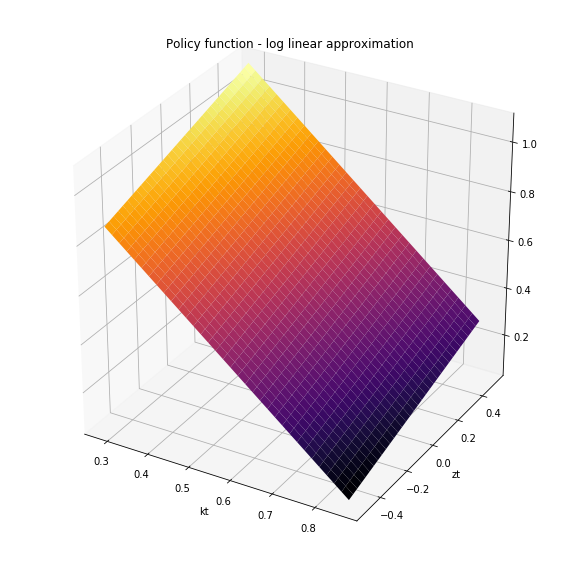

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y = np.meshgrid(dom_k, dom_z)
policy = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        policy[i,j] = Kbar_1 + P_1*(dom_k[i] - Kbar_1) + Q_1*dom_z[j]
        
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('zt')
plt.xlabel('kt')
plt.show()

### Exercise 2

Come back to this.

Need to replace K with e to the log K, then redo linearisation process etc etc.

### Exercise 3

\begin{align*}
& \mathbb E_t \left\{ F P \tilde{X}_t + F Q \tilde{Z}_{t+1} + G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + L N \tilde{Z}_t + L \varepsilon_{t+1} + M \tilde{Z}_t \right\} \\
&= \mathbb E_t \left\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1} \ + 
G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M \tilde{Z}_t \right\} \\
&= \mathbb E_t \left\{ F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + F Q \varepsilon_{t+1} \ + 
G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + L\varepsilon_{t+1} + M\tilde{Z}_t \right\} \\
&= F P^2 \tilde{X}_{t-1} + F P Q \tilde{Z}_t + F Q N \tilde{Z}_t + 
G P \tilde{X}_{t-1} + G Q \tilde{Z}_t + H \tilde{X}_{t-1} + LN \tilde{Z}_t + M\tilde{Z}_t \\
&= (F P^2 + GP + H) \tilde{X}_{t-1} + (F P Q + F Q N + G Q + LN + M) \tilde{Z}_t \\
&= ((F P + G)P + H) \tilde{X}_{t-1} + ((FQ + L)N + (FP + G)Q + M) \tilde{Z}_t \\
\end{align*}

### Exercise 4

This question is identical to the one in the previous problem set, exercise 6.

In [12]:
#Parameterisation
gamma_6 = 2.5
eta_6 = 1.5
beta_6 = 0.98
alpha_6 = 0.40
a_6 = 0.5
delta_6 = 0.10
tau_6 = 0.05
z_6 = 0.0

In [13]:
def Eul_err_6(guesskl, eul_6_args):
    gamma, eta, beta, alpha, a, delta, tau, z = eul_6_args
    
    w = (1-alpha)*((guesskl[0])**alpha)*((guesskl[1]*np.exp(z))**(-alpha))*np.exp(z)
    r = alpha*((guesskl[0])**(alpha-1))*((guesskl[1]*np.exp(z))**(1-alpha))
    c = w*guesskl[1] + (r-delta)*guesskl[0]
    
    error = np.zeros(2)
    
    error[0] = 1 - beta*((r-delta)*(1-tau) + 1)
    error[1] = a/((1-guesskl[1])**eta) - (1/(c**gamma))*w*(1-tau)
    
    return error

In [14]:
def get_ss_6(params_6, guesskl):
    gamma, eta, beta, alpha, a, delta, tau, z = params_6
    
    root = opt.root(Eul_err_6, guesskl, [gamma, eta, beta, alpha, a, delta, tau, z], tol=1e-8)  
    kl_ss = root.x
    
    return kl_ss

In [15]:
my_kl_guess = np.array([1, 0.5])
my_params_6 = gamma_6, eta_6, beta_6, alpha_6, a_6, delta_6, tau_6, z_6

In [17]:
k_ss_6, l_ss_6 = get_ss_6(my_params_6, my_kl_guess)
y_ss_6 = (k_ss_6**(alpha_6))*(l_ss_6**(1-alpha_6))
i_ss_6 = 0.1*k_ss_6

print("k_ss : ", round(k_ss_6, 6))
print("l_ss : ", round(l_ss_6, 6))
print("y_ss : ", round(y_ss_6, 6))
print("i_ss : ", round(i_ss_6, 6))

k_ss :  4.225229
l_ss :  0.579791
y_ss :  1.283226
i_ss :  0.422523


### Exercise 5

In [18]:
# Make new euler error function that has all the arguments in it

def Eul_err_5(guesskl, eul_5_args):
    gamma, eta, beta, alpha, a, delta, tau, z = eul_5_args
    
    w = (1-alpha)*((guesskl[0])**alpha)*((guesskl[1]*np.exp(z))**(-alpha))*np.exp(z)
    r = alpha*((guesskl[0])**(alpha-1))*((guesskl[1]*np.exp(z))**(1-alpha))
    T = tau*(guesskl[1]*w + (r-delta)*guesskl[0])
    c = (1-tau)*(w*guesskl[1] + (r-delta)*guesskl[0]) + T
    
    error = np.zeros(2)
    
    error[0] = 1 - beta*((r-delta)*(1-tau) + 1)
    error[1] = a/((1-guesskl[1])**eta) - (1/(c**gamma))*w*(1-tau)
    
    return error

In [19]:
#Function that gives us all the steady state values we want
def get_ss_5(params_5, guesskl=[0.5, 0.5]):
    gamma, eta, beta, alpha, a, delta, tau, z = params_5
    
    root = opt.root(Eul_err_5, guesskl, [gamma, eta, beta, alpha, a, delta, tau, z], tol=1e-8)  
    k_ss_5, l_ss_5 = root.x
    y_ss_5 = (k_ss_5**(alpha))*((l_ss_5*np.exp(z))**(1-alpha))
    i_ss_5 = delta*k_ss_5
    w_ss_5 = (1-alpha)*((k_ss_5)**alpha)*((l_ss_5*np.exp(z))**(-alpha))*np.exp(z)
    r_ss_5 = alpha*((k_ss_5)**(alpha-1))*((l_ss_5*np.exp(z))**(1-alpha))
    T_ss_5 = tau*(l_ss_5*w_ss_5 + (r_ss_5-delta)*k_ss_5)
    c_ss_5 = (1-tau)*(w_ss_5*l_ss_5 + (r_ss_5-delta)*k_ss_5) + T_ss_5
    
    return k_ss_5, l_ss_5, y_ss_5, w_ss_5, r_ss_5, T_ss_5, c_ss_5, i_ss_5

In [20]:
#function that computes a numerical derivative
def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)

In [21]:
eps = 1e-5 #set a small distance
der_mat = np.zeros((8, 8)) #initialise matrix

for i in range(8):
    new_params = my_params_6
    lst = list(new_params)
    lst[i] += eps
    new_params_1 = tuple(lst)
    diff = (np.array(get_ss_5(new_params_1)) - np.array(get_ss_5(my_params_6)))/eps
    der_mat[:, i] = diff

In [22]:
der_mat

array([[ 1.38698844e-01, -8.01653378e-01,  6.54384817e+01,
         2.59858209e+01, -1.84923655e+00, -4.83452777e+01,
        -2.32323809e+00,  2.83829501e+00],
       [ 1.90324475e-02, -1.10003927e-01,  2.60253656e-01,
        -7.69400478e-01, -2.53754656e-01,  1.31970955e+00,
        -1.38924430e-01, -1.90317887e-01],
       [ 4.21236428e-02, -2.43466697e-01,  8.29487211e+00,
         4.68385949e+00, -5.61623664e-01, -4.12087227e+00,
        -4.66717483e-01,  8.62006364e-01],
       [-9.76996262e-09,  1.82076576e-09,  7.98786854e+00,
         4.39607043e+00, -2.06501483e-09, -7.28699798e+00,
        -1.64793112e-01,  1.32795940e+00],
       [ 1.33781874e-09, -2.49800181e-10, -1.09602336e+00,
         1.17392207e-08,  2.83106871e-10,  9.99999986e-01,
         2.26131614e-02,  1.04499742e-09],
       [ 1.41268792e-03, -8.16506798e-03,  8.75511966e-02,
         1.04263870e-01, -1.88350005e-02, -1.75554504e-01,
         8.48981179e-01,  2.89088432e-02],
       [ 2.82537583e-02, -1.633013

### Exercise 6

In [23]:
# Now I will use the modules given to us instead of solving myself as I did before

In [24]:
import rouwen
import LinApp_Deriv
import LinApp_FindSS
import LinApp_Solve

In [25]:
# Copy in code from notebook that we will need, that gives us F,G,H,L,M for baseline tax model
import numpy as np
import scipy.optimize as opt

from collections import namedtuple
params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)
def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1

    ct = max(ct, 1e-8)

    return ct, rt, Tt, wt


def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0

    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)

    return np.array([intertemporal_ee, intratemporal_ee])

def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))

    return sol.x

kbar, lbar = solve_ss(m)

cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)

def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)


def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)

    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))

    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)

    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]

    return F, G, H, L, M

F, G, H, L, M = linearize(m, kbar, lbar)

In [27]:
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

#Now we have FGHLM we can try to solve for P and Q
#We dont need all these matrices, so we fill them with zeros
AA=np.zeros((0,2))
BB=np.zeros((0,2))
CC=np.zeros((0,0))
DD=np.zeros((0,1))
FF=F
GG=G
HH=H
JJ=np.zeros((2,0))
KK=np.zeros((2,0))
LL = L.reshape((2,1))
MM = M.reshape((2,1))
WW=np.zeros((0,0)) #empty list or floating point
TT=np.array([1e-8, 1e-8])
NN=0.9
Zbar=np.array([0])
Sylv = 0

#Use given module to solve for Uhlig matrices
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:', PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]]
QQ [[ 0.54504859]
 [-0.00655467]]
RR: []
SS []


### Exercise 7 

In [28]:
def policy_7(PP, QQ, state_kl, state_z):
    #Take state variables and give me control variables Kt+1 and Lt
    Contr = PP @ state_kl + QQ * state_z
    return Contr #shape (2,1)

In [29]:
def p_7(T=250, n=10000):
    sigma2=0.0004
    output_k = np.zeros((n, T))
    output_l = np.zeros((n, T))
    output_c = np.zeros((n, T))
    output_y = np.zeros((n, T))
    output_i = np.zeros((n, T))
    
    for i in range(n):
        kl = np.array([[0], [0]]) #initial values are at steady state
        z = 0.0
        ts_k = np.zeros((1, T))
        ts_l = np.zeros((1, T))
        ts_c = np.zeros((1, T))
        ts_y = np.zeros((1, T))
        ts_i = np.zeros((1, T))
        ts_z = np.zeros((1, T))
        
        for t in range(T):
            
            kl_use = kl.copy()
            ts_k[:, t] = kl_use[0]
            ts_l[:, t] = kl_use[1]
            ts_z[:, t] = z
         
            #generate new values for next period
            kl_1 = PP @ kl + QQ * z
            z_1 = 0.9*z + np.random.normal(0, np.sqrt(sigma2))
            kl = kl_1.copy()
            z = z_1
        
        ts_k_m = ts_k + k_ss_6
        ts_l_m = ts_l + l_ss_6
        ts_k1_m = np.roll(ts_k_m, -1)
        
        w = (1-alpha_6)*(ts_k_m**alpha_6)*((ts_l_m*np.exp(ts_z))**(-alpha_6))*np.exp(ts_z)
        r = alpha_6*(ts_k_m**(alpha_6 -1))*(ts_l_m*np.exp(ts_z))**(1-alpha_6)
        
        
        ts_c = w*ts_l_m + (r-delta_6)*ts_k_m + ts_k_m - ts_k1_m
        ts_i = ts_k1_m - ts_k_m + delta_6*ts_k_m
        ts_y = (ts_k_m**alpha_6)*(ts_l_m*np.exp(ts_z))**(1-alpha_6)
        
        output_k[i, :] = ts_k_m
        output_l[i, :] = ts_l_m
        output_y[i, :] = ts_y
        output_c[i, :] = ts_c
        output_i[i, :] = ts_i
    return output_k, output_l, output_y, output_c, output_i

In [30]:
out_k, out_l, out_y, out_c, out_i = p_7() #get absolute deviations in steady state for all time periods

all_k = out_k
all_l = out_l
all_y = out_y
all_c = out_c
all_i = out_i

mean_k = all_k.mean(0)
mean_k_t = all_k.mean(1)
std_k_t = np.std(all_k, axis=1)
cv_k = mean_k_t/std_k_t
k_95 = np.percentile(all_k, 95, axis=0)
k_05 = np.percentile(all_k, 5, axis=0)

mean_l = all_l.mean(0)
mean_l_t = all_l.mean(1)
std_l_t = np.std(all_l, axis=1)
cv_l = mean_l_t/std_l_t
l_95 = np.percentile(all_l, 95, axis=0)
l_05 = np.percentile(all_l, 5, axis=0)

mean_y = all_y.mean(0)
mean_y_t = all_y.mean(1)
std_y_t = np.std(all_y, axis=1)
cv_y = mean_y_t/std_y_t
y_95 = np.percentile(all_y, 95, axis=0)
y_05 = np.percentile(all_y, 5, axis=0)

mean_c = all_c.mean(0)
mean_c_t = all_c.mean(1)
std_c_t = np.std(all_c, axis=1)
cv_c = mean_c_t/std_c_t
c_95 = np.percentile(all_c, 95, axis=0)
c_05 = np.percentile(all_c, 5, axis=0)

mean_i = all_i.mean(0)
mean_i_t = all_i.mean(1)
std_i_t = np.std(all_i, axis=1)
cv_i = mean_i_t/std_i_t
i_95 = np.percentile(all_i, 95, axis=0)
i_05 = np.percentile(all_i, 5, axis=0)


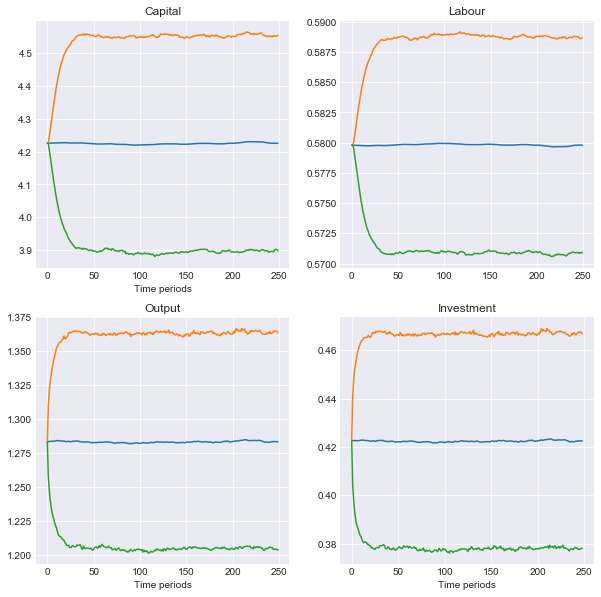

In [31]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(range(250), mean_k.T)
plt.plot(range(250), k_95.T)
plt.plot(range(250), k_05.T)
plt.xlabel('Time periods')
plt.title('Capital')

plt.subplot(2, 2, 2)
plt.plot(range(250), mean_l.T)
plt.plot(range(250), l_95.T)
plt.plot(range(250), l_05.T)
plt.title('Labour')

plt.subplot(2, 2, 3)
plt.plot(range(250), mean_y.T)
plt.plot(range(250), y_95.T)
plt.plot(range(250), y_05.T)
plt.xlabel('Time periods')
plt.title('Output')

plt.subplot(2, 2, 4)
plt.plot(range(249), mean_i.T[0:249])
plt.plot(range(249), i_95.T[0:249])
plt.plot(range(249), i_05.T[0:249])
plt.xlabel('Time periods')
plt.title('Investment')

plt.show()

### Ex 8

In [36]:
print("Means: avg value and stdev",
     "\nY: \t", mean_y_t.mean(), "\t", mean_y_t.std(), "\n"\
     "C: \t", mean_c_t.mean(), "\t", mean_c_t.std(), "\n"\
     "I: \t", mean_i_t.mean(), "\t", mean_i_t.std(), "\n"\
     "L: \t", mean_l_t.mean(), "\t", mean_l_t.std(), "\n")

print("Vols: avg value and stdev",
     "\nY: \t", std_y_t.mean(), "\t", std_y_t.std(), "\n"\
     "C: \t", std_c_t.mean(), "\t", std_c_t.std(), "\n"\
     "I: \t", std_i_t.mean(), "\t", std_i_t.std(), "\n"\
     "L: \t", std_l_t.mean(), "\t", std_l_t.std(), "\n")

print("Coeff of var: avg value and stdev",
     "\nY: \t", cv_y.mean(), "\t", cv_y.std(), "\n"\
     "C: \t", cv_c.mean(), "\t", cv_c.std(), "\n"\
     "I: \t", cv_i.mean(), "\t", cv_i.std(), "\n"\
     "L: \t", cv_l.mean(), "\t", cv_l.std(), "\n")

Means: avg value and stdev 
Y: 	 1.2833467787498638 	 0.016000066068005823 
C: 	 0.860914806405459 	 0.00836016785509001 
I: 	 0.42243197234440466 	 0.007676391136282169 
L: 	 0.5798163247482647 	 0.002097266020434655 

Vols: avg value and stdev 
Y: 	 0.043900806625474374 	 0.007684570532469282 
C: 	 0.02350760507942699 	 0.00633783966595593 
I: 	 0.027493601733055477 	 0.004986515546917745 
L: 	 0.004692920781787484 	 0.001085175297275291 

Coeff of var: avg value and stdev 
Y: 	 30.125955297673734 	 5.261119025889568 
C: 	 39.149229913730444 	 10.013548266513448 
I: 	 15.844369880091655 	 2.7433671566865807 
L: 	 130.4260161538609 	 31.352071857973286 



### Exercise 9

In [37]:
def p_9(T=40, n=1):
    
    output_k = np.zeros((n, T))
    output_l = np.zeros((n, T))
    output_c = np.zeros((n, T))
    output_y = np.zeros((n, T))
    output_i = np.zeros((n, T))
    
    for i in range(n):
        kl = np.array([[0], [0]]) #initial values are at steady state
        z = 0.002
        ts_k = np.zeros((1, T))
        ts_l = np.zeros((1, T))
        ts_c = np.zeros((1, T))
        ts_y = np.zeros((1, T))
        ts_i = np.zeros((1, T))
        ts_z = np.zeros((1, T))
        
        for t in range(T):
            
            kl_use = kl.copy()
            ts_k[:, t] = kl_use[0]
            ts_l[:, t] = kl_use[1]
            ts_z[:, t] = z
         
            #generate new values for next period
            kl_1 = PP @ kl + QQ * z
            z_1 = 0.9*z
            kl = kl_1.copy()
            z = z_1
        
        ts_k_m = ts_k + k_ss_6
        ts_l_m = ts_l + l_ss_6
        ts_k1_m = np.roll(ts_k_m, -1)
        
        w = (1-alpha_6)*(ts_k_m**alpha_6)*((ts_l_m*np.exp(ts_z))**(-alpha_6))*np.exp(ts_z)
        r = alpha_6*(ts_k_m**(alpha_6 -1))*(ts_l_m*np.exp(ts_z))**(1-alpha_6)
        
        
        ts_c = w*ts_l_m + (r-delta_6)*ts_k_m + ts_k_m - ts_k1_m
        ts_i = ts_k1_m - ts_k_m + delta_6*ts_k_m
        ts_y = (ts_k_m**alpha_6)*(ts_l_m*np.exp(ts_z))**(1-alpha_6)
        
        output_k[i, :] = ts_k_m
        output_l[i, :] = ts_l_m
        output_y[i, :] = ts_y
        output_c[i, :] = ts_c
        output_i[i, :] = ts_i
    return output_k, output_l, output_y, output_c, output_i

In [38]:
out_k_imp, out_l_imp, out_y_imp, out_c_imp, out_i_imp = p_9() #get absolute deviations in steady state for all time periods

all_k_imp = out_k_imp
all_l_imp = out_l_imp
all_y_imp = out_y_imp
all_c_imp = out_c_imp
all_i_imp = out_i_imp

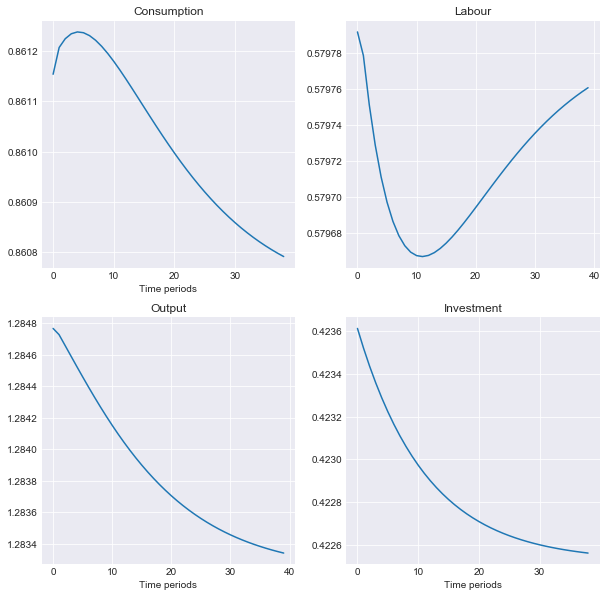

In [39]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(range(39), all_c_imp.T[0:39])
plt.xlabel('Time periods')
plt.title('Consumption')

plt.subplot(2, 2, 2)
plt.plot(range(40), all_l_imp.T)
plt.title('Labour')

plt.subplot(2, 2, 3)
plt.plot(range(40), all_y_imp.T)
plt.xlabel('Time periods')
plt.title('Output')

plt.subplot(2, 2, 4)
plt.plot(range(39), all_i_imp.T[0:39])
plt.xlabel('Time periods')
plt.title('Investment')

plt.show()